# عاطفه محمدی 

*project name* : CA0 <br>
*aim of project* : filling the missing data in a dataset using statistical analysis <br>

توضیح کلی و تعریف صورت مسئله :

در پروژه صفر می خواهیم روی یک دیتاست که شامل برخی اطلاعات در مورد 1000 نفر (مثل سن و جنسیت و مصرف روزانه اینترنت آن ها) و این که آیا روی آگهی به خصوصی که به آن ها نمایش داده شده است کلیک کرده اند یا خیر، مقداری تحلیل های پایه ای آماری و نیز بصری سازی داده ها را انجام دهیم. سپس می خواهیم با دو روش مختلف، سلول هایی که در این دیتاست خالی هستند و مقدار ندارند را پر کنیم و این دو روش را مقایسه می کنیم. در ادامه به مقایسه زمان اجرای وکتورایزیشن و حلقه ها با ذکر یک مثال می پردازیم. و در نهایت تلاش داریم تا با مقایسه میانگین و انحراف معیار ستون های عددی این دیتاست، مقدار ستون هدف (کلیک یا عدم کلیک روی آگهی) را پیش بینی نماییم. 

# 1)

First we import the libraries needed. <br>
"%matplotlib inline" makes seeing the diagrams inside jupyter notebook possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from scipy.stats import norm

Then we attempt to read the dataset given to us which is a csv file named "advertising_dataset", in order to fill its missing values and do some statistical analysis on it. We set the "index_col" parameter to "0"; because otherwise pandas makes another column for indexing and uses the index column which is already in the csv file, as a data column and does analysis on it; which is not what we want.

In [2]:
df = pd.read_csv('C://Users//Atefeh//Downloads//AI//CA0//advertising_dataset.csv', index_col=0)

calling head() function on a pandas dataframe, returns the first 5 rows of the dataset by default. this number can be modified by passing another number to the head() function.

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


calling tail() function on a pandas dataframe, returns the last 5 rows of the dataset by default. this number can be modified by passing another number to the tail() function.

In [5]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


df.describe() returns some statistical information about the numerical columns of the dataframe; including the minimum and maximum value of each column, 1st, 2nd and 3rd quartiles, standard diviation and mean of each column.

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


# 2)

df.info() shows how many non null values are in each column and the data type of each of them.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  907 non-null    float64
 1   Age                       979 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      913 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


"Gender" column's data type is "object" which is a string; we want to change it to integer. By convention, "Male" is substituted to 1 and "Female" changes to 0. <br>
We create a "dummies" object off of the "Gender" column, which is a binary dataframe regarding to each value in the "Gender" column.

In [3]:
d = pd.get_dummies(df['Gender'])

In [6]:
d

,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
995,0,1
996,0,1
997,0,1
998,1,0


Here we need to substitute the "Male" column of "d" with the "Gender" column of "df". Because "1" in each row of the "Male" column of "d", means that instance is a male, and "0" means it's a female.

In [4]:
df['Gender'] = d['Male']

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


# 3)

In order to find out how many "Nan" values exists in each column, we call isna() function on our dataframe; which returns a boolean dataframe, then call sum() off of the result; to calculate the summation of the number of True values.

In [8]:
df.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

So we found out, skipping the target column, we have 3 columns that contain Nan values. One way to fill these empty cells is to use fillna() and set its "value" to the mean of the same column we are filling in, and then setting "inplace" to True to affect the actual dataframe.<br>
Another way to do so, is to drop the rows containing a missing value. Comparing these two methods, I shall say that the latter causes losing some pieces of data, but ensures that the remaining rows are the actual values that were reported in the csv file. In contrast, replacing those data with an estimation such as the mean of the containing column, makes some sort of fake data, but instead we do not lose any instances.

In [6]:
df['Daily Time Spent on Site'].fillna(value=df['Daily Time Spent on Site'].mean(), inplace=True)
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(value=df['Daily Internet Usage'].mean(), inplace=True)

Here I checked the dataframe again and it seems like everything is fine.

In [7]:
df.isna().sum()

Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

# 4)

Calling "value_counts()" on a pandas Series, counts the number of occurences of each unique value in that Series. So, here by calling value_counts() on the "gender" column, we understand that there are 481 males and 519 females in the dataset.

In [16]:
df['Gender'].value_counts()

0    519
1    481
Name: Gender, dtype: int64

With the same approach as above, there are 419 instances who did not click on the Ad and 413 who did.

In [17]:
df['Clicked on Ad'].value_counts()

0.0    419
1.0    413
Name: Clicked on Ad, dtype: int64

# 5)

In this part we are supposed to count how many females (my gender) there are whose ages are above 22 years old (my age). We create two boolean Serieses : (df['Age'] > 22) and (df['Gender'] == 0). In order to consider both conditions, there is an ampersand between the two. <br>
df[(df['Age'] > 22) & (df['Gender'] == 0)] returns a dataframe with objects that only have those two conditions. Lastly we count the number of those people using a column other than the target column ("age" for example).

In [18]:
df[(df['Age'] > 22) & (df['Gender'] == 0)].count()['Age']

505

# 6)

In order to find out the mean age of the users who clicked and did not click on the ad, I grouped the dataset by "Clicked on Ad" column and then called mean() on it and grabbed the "Age" column of it.

In [15]:
tic = time.time()
print(df.groupby('Clicked on Ad').mean()['Age'])
toc = time.time()
print('vectorization time : {} ms'.format((toc-tic)*1000))

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64
vectorization time : 9.990453720092773 ms


So the average people who clicked on the ad are 40.2 years old and the average people who didn't click on the ad are 31.7 years old and it took about 11 milli seconds to calculate this, using vectorization on this run.

# 7)

Here the goal is to calculate the same thing as previous question, but to use for loop.

In [16]:
tic = time.time()
s = 0
for val in df[df['Clicked on Ad'] == 0]['Age']:
    s += val
print('Clicked on Ad 0.0 :', s/len(df[df['Clicked on Ad'] == 0]['Age']))
s = 0
for val in df[df['Clicked on Ad'] == 1]['Age']:
    s += val
print('Clicked on Ad 1.0 :', s/len(df[df['Clicked on Ad'] == 1]['Age']))
toc = time.time()
print('for loop time : {} ms'.format((toc-tic)*1000))

Clicked on Ad 0.0 : 31.723325881701896
Clicked on Ad 1.0 : 40.295599848637366
for loop time : 11.996269226074219 ms


The result of the average age is similar to the above. However, it took about 13 milli seconds which is about 2 milli seconds slower than the vectorization approach. So we conclude that we can have faster calculation on pandas Serieses using vactorization.

# 8)

In order to visualize the distribution of each column, we make an axes object wiyh matplotlib library and use hist() function to draw a histogram on each column and we increase the number of bins to better see the details.

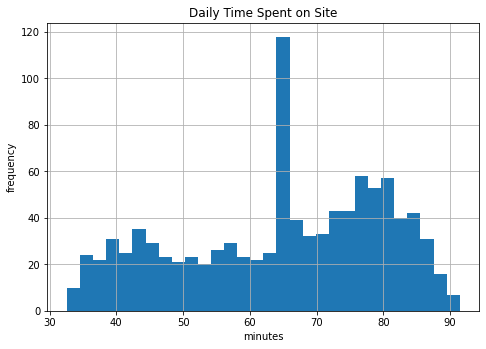

In [51]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('minutes')
axes.set_ylabel('frequency')
axes.set_title('Daily Time Spent on Site')
df['Daily Time Spent on Site'].hist(bins=30)

So most of the people in our dataset spend about 65 minutes per day on the web.

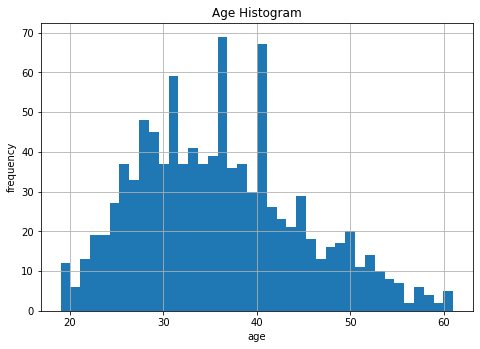

In [57]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('age')
axes.set_ylabel('frequency')
axes.set_title('Age Histogram')
df['Age'].hist(bins=40)

Most people in the dataset are aged between 30 and 40.

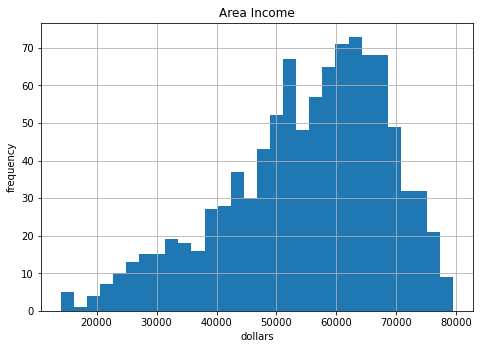

In [58]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('dollars')
axes.set_ylabel('frequency')
axes.set_title('Area Income')
df['Area Income'].hist(bins=30)

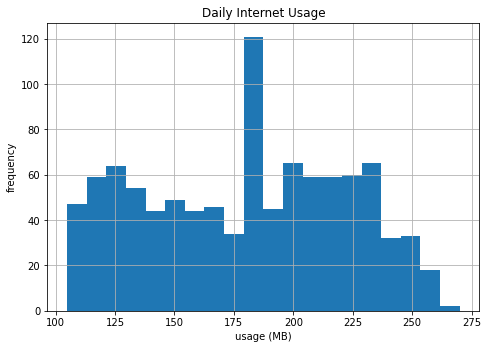

In [59]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('usage (MB)')
axes.set_ylabel('frequency')
axes.set_title('Daily Internet Usage')
df['Daily Internet Usage'].hist(bins=20)

By calling nunique(), we find out that there are exactly 1000 unique ad topics and time stamps, which means that no two rows of the dataset have the same topics or time stamps. So, there won't be much information in the histogram because there is only one instanse for each topic line or time stamp.

In [18]:
df['Ad Topic Line'].nunique()

1000

In [21]:
df['Timestamp'].nunique()

1000

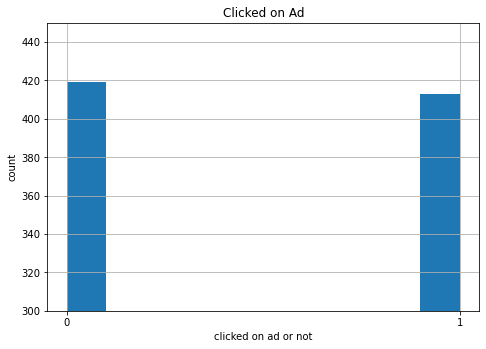

In [116]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('clicked on ad or not')
axes.set_ylabel('count')
axes.set_title('Clicked on Ad')
axes.set_ylim([300,450])
plt.xticks([0,1])
df['Clicked on Ad'].hist()

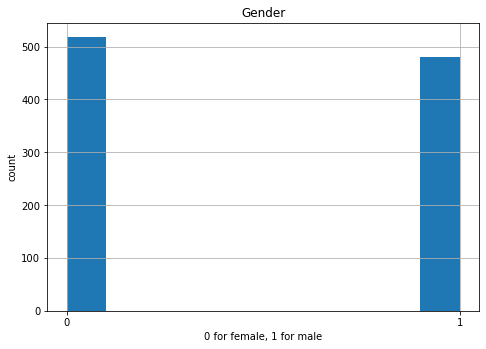

In [117]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('0 for female, 1 for male')
axes.set_ylabel('count')
axes.set_title('Gender')
plt.xticks([0,1])
df['Gender'].hist()

# 9)

checking the df.info() again:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   uint8  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(4), uint8(1)
memory usage: 79.1+ KB


We want to eliminate non-numerical columns, and Gender column because we want to do numerical analysis from now on.

In [8]:
df.drop(['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'], axis=1, inplace=True)

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35.0,61833.90,256.090000,0.0
1,80.23,31.0,68441.85,179.751271,0.0
2,69.47,26.0,59785.94,236.500000,0.0
3,74.15,29.0,54806.18,245.890000,0.0
4,68.37,35.0,73889.99,225.580000,0.0


Then,in order to normalize the data, for each column of the dataset (except "Clicked on Ad"), we substract its mean of its values and then divide the result by the standard diviation of that column.

In [10]:
df['Daily Time Spent on Site'] = (df['Daily Time Spent on Site'] - df['Daily Time Spent on Site'].mean()) / df['Daily Time Spent on Site'].std()

In [11]:
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

In [12]:
df['Area Income'] = (df['Area Income'] - df['Area Income'].mean()) / df['Area Income'].std()

In [13]:
df['Daily Internet Usage'] = (df['Daily Internet Usage'] - df['Daily Internet Usage'].mean()) / df['Daily Internet Usage'].std()

In [14]:
df.head()
# normalized dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0


# 10)

Written below, I got the mean and standard diviation of the numerical columns, based on whether they clicked on the ad or not.

In [16]:
groupedby_mean = df.groupby('Clicked on Ad').mean()
groupedby_mean

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,
0.0,0.714104,-0.493148,0.476367,0.764216
1.0,-0.691783,0.493211,-0.498632,-0.753395


In [17]:
groupedby_std = df.groupby('Clicked on Ad').std()
groupedby_std

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,
0.0,0.531369,0.706315,0.670476,0.592058
1.0,0.836161,1.019268,1.046199,0.723959


A function to retrieve values from the above dataframes :

In [18]:
def get_value(data, click, label):
    return data.loc[click].loc[label]

In [19]:
columns = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']

Separating the dataframe into 2 dataframes based on the target column value, for better accessibility:

In [20]:
df0 = df[df['Clicked on Ad']==0]
df1 = df[df['Clicked on Ad']==1]

Refering to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html , norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale with y = (x - loc) / scale. So here we have "y" because we did normalize the values in all columns, therefore in order to plot the probability density function (pdf) of each column, we provide the values of that column on the horizontal axis and for the vertical axis, we say : norm.pdf("values")/std(value) .
As it is shown in the cell below, pdf for "Daily Time Spent on Site" is being plotted for both who clicked and didn't click on the ad.

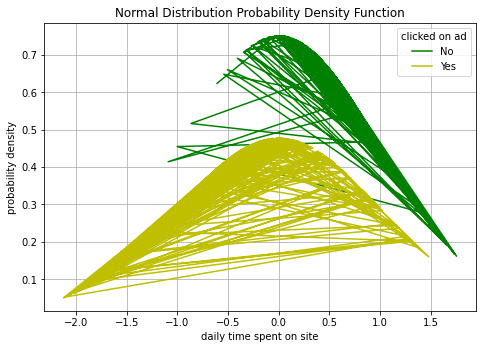

In [47]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df0['Daily Time Spent on Site'], norm.pdf(df0['Daily Time Spent on Site']) / get_value(groupedby_std, 0, 'Daily Time Spent on Site'), label='No', color='g')    
axes.plot(df1['Daily Time Spent on Site'], norm.pdf(df1['Daily Time Spent on Site']) / get_value(groupedby_std, 1, 'Daily Time Spent on Site'), label='Yes', color='y')
axes.set_xlabel('daily time spent on site')
axes.set_ylabel('probability density')
axes.set_title('Normal Distribution Probability Density Function')
axes.legend(loc='best', frameon=True, title='clicked on ad')
axes.grid(True)

The same plot for age column:

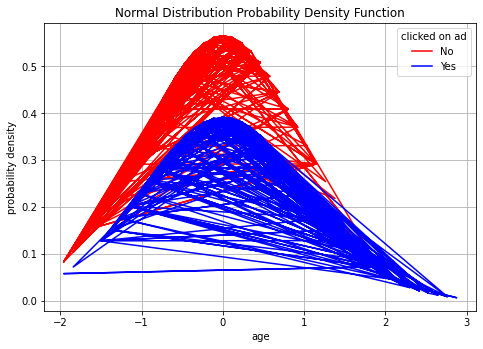

In [48]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df0['Age'], norm.pdf(df0['Age']) / get_value(groupedby_std, 0, 'Age'), label='No', color='r')    
axes.plot(df1['Age'], norm.pdf(df1['Age']) / get_value(groupedby_std, 1, 'Age'), label='Yes', color='b')
axes.set_xlabel('age')
axes.set_ylabel('probability density')
axes.set_title('Normal Distribution Probability Density Function')
axes.legend(loc='best', frameon=True, title='clicked on ad')
axes.grid(True)

and for "area income" column:

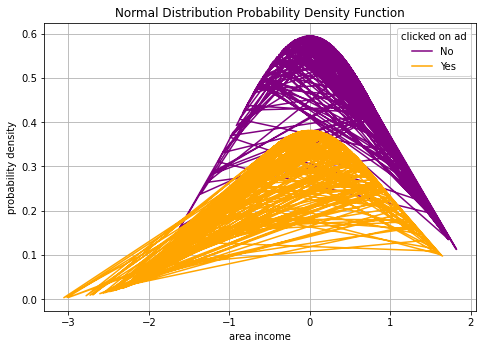

In [72]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df0['Area Income'], norm.pdf(df0['Area Income']) / get_value(groupedby_std, 0, 'Area Income'), label='No', color='purple')    
axes.plot(df1['Area Income'], norm.pdf(df1['Area Income']) / get_value(groupedby_std, 1, 'Area Income'), label='Yes', color='orange')
axes.set_xlabel('area income')
axes.set_ylabel('probability density')
axes.set_title('Normal Distribution Probability Density Function')
axes.legend(loc='best', frameon=True, title='clicked on ad')
axes.grid(True)

and for "daily internet usage" column:

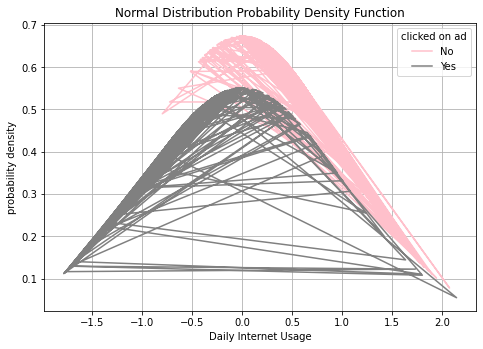

In [50]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df0['Daily Internet Usage'], norm.pdf(df0['Daily Internet Usage']) / get_value(groupedby_std, 0, 'Daily Internet Usage'), label='No', color='pink')    
axes.plot(df1['Daily Internet Usage'], norm.pdf(df1['Daily Internet Usage']) / get_value(groupedby_std, 1, 'Daily Internet Usage'), label='Yes', color='gray')
axes.set_xlabel('Daily Internet Usage')
axes.set_ylabel('probability density')
axes.set_title('Normal Distribution Probability Density Function')
axes.legend(loc='best', frameon=True, title='clicked on ad')
axes.grid(True)

با توجه به چهار نمودار بالا، برداشت من این بود که هر نموداری که دو منحنی رسم شده در آن بیشتر از هم فاصله داشته باشند، برای معیار قرار داده شدن جهت تخمین مقادیر ستون هدف مناسب تر می باشد. و در بین این چهار نمودار، اولین آن ها (که با رنگ سبز و زرد رسم شده است) تفاوت بیشتری دارند ( این تفاوت در قله نمودار بیشتر مشهود می باشد) بنابراین اگر این ستون را مبنا قرار دهیم باعث ایجاد تمایز بیشتر بین کلاس های 0 و 1 می شود و تخمین ما به واقعیت نزدیک تر خواهد بود.

In this for loop, for each Nan value in the target column, we checked the value of its 'Daily Time Spent on Site' column. If it was in the interval of " mean - std " and " mean + std " of the class 0, we substitute the Nan value with 0, and if it was in the same interval for class 1, we substitue it with 1 ; and for those values that don't fall under neither of these categories, we decided to substitute it with 0 :

In [18]:
for i in range(1000):
    if pd.isna(df['Clicked on Ad'][i]):
        if df['Daily Time Spent on Site'][i]> (groupedby_mean.loc[0].loc['Daily Time Spent on Site']-groupedby_std.loc[0].loc['Daily Time Spent on Site']) and df['Daily Time Spent on Site'][i]< (groupedby_mean.loc[0].loc['Daily Time Spent on Site']+groupedby_std.loc[0].loc['Daily Time Spent on Site']):
            df['Clicked on Ad'][i] = 0
        elif df['Daily Time Spent on Site'][i]> (groupedby_mean.loc[1].loc['Daily Time Spent on Site']-groupedby_std.loc[1].loc['Daily Time Spent on Site']) and df['Daily Time Spent on Site'][i]< (groupedby_mean.loc[1].loc['Daily Time Spent on Site']+groupedby_std.loc[1].loc['Daily Time Spent on Site']):
            df['Clicked on Ad'][i] = 1
        else:
            df['Clicked on Ad'][i] = 0        

Now checking the null values again, there is no more Nan value in "Clicked on Ad" column.

In [19]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Clicked on Ad               0
dtype: int64

saving the result dataframe as a csv :

In [20]:
df.to_csv('C://Users//Atefeh//Desktop//Python-Data-Science-and-Machine-Learning-Bootcamp//AI course//output.csv')